In [617]:
# ======================= Importing libraries ===================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [618]:
# ====================== Reading data from Titanic Dataset =======================
train_data = pd.read_csv('./train.csv', header=0)
#print train_data.head()
print train_data.shape
print "Number of rows(passengers):",train_data.shape[0]
print "Number of cols(features):",train_data.shape[1]
print train_data.columns
train_data.isnull().sum()

(891, 12)
Number of rows(passengers): 891
Number of cols(features): 12
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature Engineering

In [619]:
# change confusing/unclear column names to easily recognizable ones
new_col_names = ['Passenger_id', 'Survived', 'Ticket_class', 'Name', 'Gender', 'Age',
                 'Siblings_spouses_aboard', 'Parents_children_aboard', 'Ticket_number', 'Fare',
                'Cabin_number', 'Port_of_embarkation']
train_data.columns = new_col_names
print train_data.columns

Index([u'Passenger_id', u'Survived', u'Ticket_class', u'Name', u'Gender',
       u'Age', u'Siblings_spouses_aboard', u'Parents_children_aboard',
       u'Ticket_number', u'Fare', u'Cabin_number', u'Port_of_embarkation'],
      dtype='object')


In [620]:
# Change 'Survived' column values
train_data['Survived'] = train_data['Survived'].map({0:'Died', 1:'Survived'})
print train_data['Survived'].head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survived, dtype: object


In [621]:
# Change 'Ticket_class' column values 
train_data['Ticket_class'] = train_data['Ticket_class'].map({1:'First class', \
                                                             2:'Second class',3:'Third class'})
print train_data['Ticket_class'].head()

0    Third class
1    First class
2    Third class
3    First class
4    Third class
Name: Ticket_class, dtype: object


In [622]:
# Change 'Port_of_embarkation' column values
train_data['Port_of_embarkation'] = train_data['Port_of_embarkation'].map({'S':'Southampton', \
                                                                           'C':'Cherbourg', \
                                                                           'Q':'Queenstown'})
print train_data['Port_of_embarkation'].head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Port_of_embarkation, dtype: object


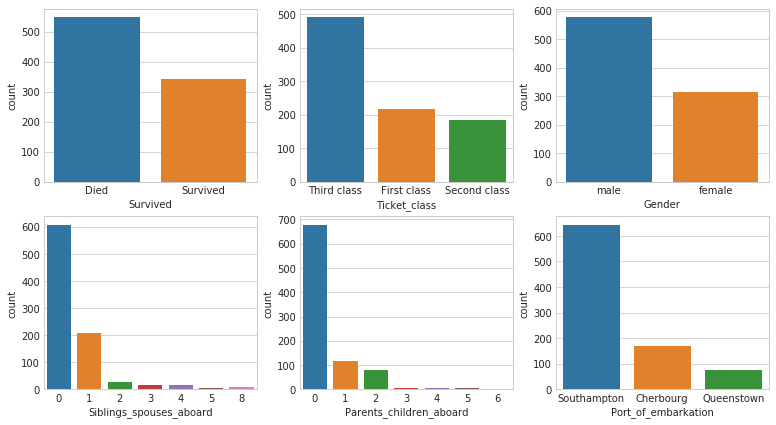

In [623]:
fig = plt.figure(figsize=(13, 7))
columns = ['Survived', 'Ticket_class', 'Gender', 'Siblings_spouses_aboard',\
           'Parents_children_aboard', 'Port_of_embarkation']
for i in range (0,len(columns)):
    fig.add_subplot(2,3,i+1)
    sns.countplot(x=columns[i], data=train_data);            
plt.show()
fig.clear()

## Investigation of Titanic dataset
1. Selection of feature to test against survival.
    - **Useful features:** Gender, Ticket_class, Fare, Age
    - **Useless features:** Passenger_id, Name, Siblings_spouses_aboard, Parents_children_aboard, Ticket_number, Cabin_number, Port_of_embarkation
    
## Let us see whether Passenger gender correlates with survival?
### Gender seems to affect survival.
#### Let's prove by using Pearson's chi-squared test for goodness of fit because gender is a categorical variable.
1. Null hypothesis (H<sub>0</sub>): The death rate for males and females is 61.62.
2. Alternative hypothesis (H<sub>1</sub>): The death rate for males and females is not 61.62.
3. Find the chi-square statistic and p-value in the chi-square table.
4. Decide whether to support or reject the null hypothesis. In general, small p-values would cause you to reject the null hypothesis. 

In [624]:
# Features
print train_data['Gender'].unique()
print train_data['Survived'].unique()

['male' 'female']
['Died' 'Survived']


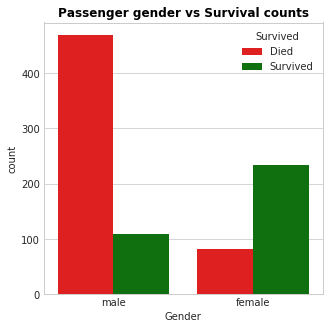

In [625]:
# Graph visualization
gender_vs_survive = train_data[['Gender', 'Survived']]
#print gender_vs_survive
colors = ['green' if (x=='Survived') else 'red' for x in gender_vs_survive['Survived']]
plot = sns.countplot(x='Gender', hue='Survived', data=gender_vs_survive, palette=colors)
plot.axes.set_title('Passenger gender vs Survival counts', fontsize=12, fontweight='bold',\
                    color="black")
plot.figure.set_size_inches(5,5)
sns.set_style("whitegrid")

In [626]:
# Description of male passengers
print "Description of male passengers:"
male = len(gender_vs_survive[(gender_vs_survive['Gender'] == 'male')])
male_survive = len(gender_vs_survive[(gender_vs_survive['Gender'] == 'male') & \
                                  (gender_vs_survive['Survived'] == 'Survived')])
male_died = len(gender_vs_survive[(gender_vs_survive['Gender'] == 'male') & \
                                  (gender_vs_survive['Survived'] == 'Died')])
print "male:", male
print "male survive:", male_survive
print "male died:", male_died
print "male deaths(%):",(male_died/float(male))*100
print "===================================="

# Description of female passengers
print "Description of female passengers:"
female = len(gender_vs_survive[(gender_vs_survive['Gender'] == 'female')])
female_survive = len(gender_vs_survive[(gender_vs_survive['Gender'] == 'female') & \
                                  (gender_vs_survive['Survived'] == 'Survived')])
female_died = len(gender_vs_survive[(gender_vs_survive['Gender'] == 'female') & \
                                  (gender_vs_survive['Survived'] == 'Died')])
print "female:", female
print "female survive:", female_survive
print "female died:", female_died
print "female deaths(%):",(female_died/float(female))*100
print "===================================="

# Description of all passengers
print "Description of all passengers:"
total_pass = male + female
total_survive = male_survive + female_survive
total_died = male_died + female_died
print "Total passengers:", total_pass
print "Total survive:", total_survive
print "Total died:", total_died
print "Total deaths(%)", ((total_died/float(total_pass))*100)

Description of male passengers:
male: 577
male survive: 109
male died: 468
male deaths(%): 81.1091854419
Description of female passengers:
female: 314
female survive: 233
female died: 81
female deaths(%): 25.7961783439
Description of all passengers:
Total passengers: 891
Total survive: 342
Total died: 549
Total deaths(%) 61.6161616162


In [627]:
survive_ratio = (total_survive/float(total_pass))
died_ratio = (total_died/float(total_pass))
obs_freq = [male_survive, female_survive, male_died, female_died]
exp_freq = [(male * survive_ratio), (female * survive_ratio), (male * died_ratio), (female * died_ratio)]
print "Observed frequency table:",obs_freq
print "Expected frequency table:",exp_freq

# Pearson's chi-squared test (goodness of fit)
chi_sq_test = scipy.stats.chisquare(obs_freq, f_exp=exp_freq, ddof=1, axis=None)
print "chi-square statistic:",chi_sq_test[0]
print "p-value:",chi_sq_test[1]

Observed frequency table: [109, 233, 468, 81]
Expected frequency table: [221.47474747474746, 120.52525252525251, 355.5252525252525, 193.47474747474746]
chi-square statistic: 263.050574071
p-value: 7.57344733665e-58


## Conclusion
- Null hypothesis is rejected because of extremely tiny probability.
- Female passengers are more likely to survive than male passengers.

## Let us see whether Passenger class correlates with survival?
#### Let's prove by using Pearson's chi-squared test for goodness of fit because class is a categorical variable.
1. (H<sub>0</sub>): The death rate of all passengers class is 61.62.
2. (H<sub>1</sub>): The death rate of all passengers class is not 61.62.
3. Find the chi-square statistic and p-value in the chi-square table.
4. Decide whether to support or reject the null hypothesis. In general, small p-values would cause you to reject the null hypothesis. 

In [628]:
# Features
print train_data['Ticket_class'].unique()
print train_data['Survived'].unique()

['Third class' 'First class' 'Second class']
['Died' 'Survived']


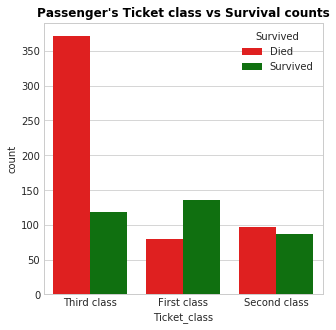

In [629]:
# Graph visualization
class_vs_survive = train_data[['Ticket_class', 'Survived']]
#print class_vs_survive
colors = ['green' if (x=='Survived') else 'red' for x in gender_vs_survive['Survived']]
plot = sns.countplot(x='Ticket_class', hue='Survived', data=class_vs_survive, palette=colors)
plot.axes.set_title('Passenger\'s Ticket class vs Survival counts', fontsize=12, fontweight='bold',\
                    color="black")
plot.figure.set_size_inches(5,5)
sns.set_style("whitegrid")

In [630]:
# Description of First class passengers
print "Description of First class passengers:" 
First_class_pass = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'First class')])
First_class_survive = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'First class') & \
                                  (class_vs_survive['Survived'] == 'Survived')])
First_class_died = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'First class') & \
                                  (class_vs_survive['Survived'] == 'Died')])
print "First class pass:", First_class_pass
print "First class survive:", First_class_survive
print "First class died:", First_class_died
print "First class deaths(%):",(First_class_died/float(First_class_pass))*100
print "====================================="

# Description of Second class passengers
print "Description of Second class passengers:"
Second_class_pass = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'Second class')])
Second_class_survive = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'Second class') & \
                                  (class_vs_survive['Survived'] == 'Survived')])
Second_class_died = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'Second class') & \
                                  (class_vs_survive['Survived'] == 'Died')])
print "Second class pass:", Second_class_pass
print "Second class survive:", Second_class_survive
print "Second class died:", Second_class_died
print "Second class deaths(%):",(Second_class_died/float(Second_class_pass))*100
print "====================================="
       
# Description of Third class passengers
print "Description of Third class passengers:"
Third_class_pass = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'Third class')])
Third_class_survive = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'Third class') & \
                                  (class_vs_survive['Survived'] == 'Survived')])
Third_class_died = len(class_vs_survive[(class_vs_survive['Ticket_class'] == 'Third class') & \
                                  (class_vs_survive['Survived'] == 'Died')])
print "Third class pass:", Third_class_pass
print "Third class survive:", Third_class_survive
print "Third class died:", Third_class_died
print "Third class deaths(%):",(Third_class_died/float(Third_class_pass))*100
print "====================================="

# Description of all passengers
print "Description of all passengers:"
total_pass = First_class_pass + Second_class_pass + Third_class_pass
total_survive = First_class_survive + Second_class_survive + Third_class_survive
total_died = First_class_died + Second_class_died + Third_class_died
print "Total passengers:", total_pass
print "Total survive:", total_survive
print "Total died:", total_died
print "Total deaths(%)", ((total_died/float(total_pass))*100)

Description of First class passengers:
First class pass: 216
First class survive: 136
First class died: 80
First class deaths(%): 37.037037037
Description of Second class passengers:
Second class pass: 184
Second class survive: 87
Second class died: 97
Second class deaths(%): 52.7173913043
Description of Third class passengers:
Third class pass: 491
Third class survive: 119
Third class died: 372
Third class deaths(%): 75.7637474542
Description of all passengers:
Total passengers: 891
Total survive: 342
Total died: 549
Total deaths(%) 61.6161616162


In [631]:
survive_ratio = (total_survive/float(total_pass))
died_ratio = (total_died/float(total_pass))
obs_freq = [First_class_survive, Second_class_survive, Third_class_survive,\
            First_class_died, Second_class_died, Third_class_died]
exp_freq = [(First_class_pass * survive_ratio), (Second_class_pass * survive_ratio),\
            (Third_class_pass * survive_ratio),(First_class_pass * died_ratio), \
            (Second_class_pass * died_ratio), (Third_class_pass * died_ratio)]
print "Observed frequency table:",obs_freq
print "Expected frequency table:",exp_freq

# Pearson's chi-squared test (goodness of fit)
chi_sq_test = scipy.stats.chisquare(obs_freq, f_exp=exp_freq, ddof=1, axis=None)
print "chi-square statistic:",chi_sq_test[0]
print "p-value:",chi_sq_test[1]

Observed frequency table: [136, 87, 119, 80, 97, 372]
Expected frequency table: [82.9090909090909, 70.62626262626262, 188.46464646464645, 133.0909090909091, 113.37373737373737, 302.5353535353535]
chi-square statistic: 102.888988757
p-value: 2.38583205799e-21


## Conclusion
- Null hypothesis is rejected because of extremely tiny probability.
- The higher a passenger's class, the more likely that the passenger survives.

# Machine Learning on Titanic dataset 

In [632]:
# ===================== Importing machine learning libraries ===========================================
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from collections import Counter
import matplotlib.pyplot as plt

## Data Cleaning
### Goal:
    1. Fix missing values
    2. Fix data structures
    3. Save new cleaned data sets

In [633]:
# ============================ Data Cleaning ====================================================

# Filling missing values
train_data['Age'] = train_data['Age'].fillna(train_data.Age.mean())
train_data['Fare'] = train_data['Fare'].fillna(train_data.Fare.mean())
train_data['Port_of_embarkation'] = train_data['Port_of_embarkation'].fillna(\
                                    train_data.Port_of_embarkation.value_counts().idxmax())

# Create some new features (Family_size, Is_alone) from the existing features
for data in train_data:
    train_data['Family_size'] = train_data['Siblings_spouses_aboard'] + train_data['Parents_children_aboard'] + 1
for data in train_data:
    train_data['Is_alone'] = 0
    train_data.loc[train_data['Family_size'] == 1, 'Is_alone'] = 1
    
# Save clean train data
clean_train_data = train_data

In [634]:
# ============================== Feature extraction =================================================
 
# Convert text into numeric form
clean_train_data['Survived'] = clean_train_data['Survived'].map({'Died': 0, 'Survived': 1})

clean_train_data['Ticket_class'] = clean_train_data['Ticket_class'].map({'First class': 1, \
                                                             'Second class': 2, 'Third class': 3})

clean_train_data['Gender'] = clean_train_data['Gender'].map( {'female': 0, 'male': 1} ).astype(int)

clean_train_data['Port_of_embarkation'] = clean_train_data['Port_of_embarkation'].map( \
                                    {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2} ).astype(int)

clean_train_data.loc[ clean_train_data['Fare'] <= 7.91, 'Fare'] = 0
clean_train_data.loc[(clean_train_data['Fare'] > 7.91) & (clean_train_data['Fare'] <= 14.454), 'Fare'] = 1
clean_train_data.loc[(clean_train_data['Fare'] > 14.454) & (clean_train_data['Fare'] <= 31), 'Fare']   = 2
clean_train_data.loc[ clean_train_data['Fare'] > 31, 'Fare'] = 3
clean_train_data['Fare'] = clean_train_data['Fare'].astype(int)

clean_train_data.loc[ clean_train_data['Age'] <= 16, 'Age'] = 0
clean_train_data.loc[(clean_train_data['Age'] > 16) & (clean_train_data['Age'] <= 32), 'Age'] = 1
clean_train_data.loc[(clean_train_data['Age'] > 32) & (clean_train_data['Age'] <= 48), 'Age'] = 2
clean_train_data.loc[(clean_train_data['Age'] > 48) & (clean_train_data['Age'] <= 64), 'Age'] = 3
clean_train_data.loc[ clean_train_data['Age'] > 64, 'Age'] = 4
clean_train_data['Age'] = clean_train_data['Age'].astype(int)

# Feature Selection
drop_elements = ['Passenger_id', 'Name', 'Cabin_number', 'Ticket_number', 'Family_size', 'Siblings_spouses_aboard',\
                 'Parents_children_aboard']

train_data_feature = clean_train_data.drop(drop_elements, axis = 1)
print train_data_feature.head(10)

   Survived  Ticket_class  Gender  Age  Fare  Port_of_embarkation  Is_alone
0         0             3       1    1     0                    0         0
1         1             1       0    2     3                    1         0
2         1             3       0    1     1                    0         1
3         1             1       0    2     3                    0         0
4         0             3       1    2     1                    0         1
5         0             3       1    1     1                    2         1
6         0             1       1    3     3                    0         1
7         0             3       1    0     2                    0         0
8         1             3       0    1     1                    0         0
9         1             2       0    0     2                    1         0


In [635]:
# =========================== Classification algorithm =================================================
train_data_feature = train_data_feature.values
#print(train_data_feature)
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
x = train_data_feature[0::, 1::]
y = train_data_feature[0::, 0]

classifiers = [GaussianNB(), RandomForestClassifier(n_estimators=150,  max_depth=30), svm.LinearSVC(C=0.01),\
               LogisticRegression(C=.01, max_iter=100), DecisionTreeClassifier(criterion="entropy", max_depth=30),\
               KNeighborsClassifier(n_neighbors=5), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(),\
               BaggingClassifier(n_estimators=150), AdaBoostClassifier(n_estimators=150),\
               GradientBoostingClassifier(n_estimators=150)]
classifier_accuracy  = {}
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for classifier in classifiers:
        classifier_name = classifier.__class__.__name__
        classifier.fit(x_train, y_train)
        predictions = classifier.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        if classifier_name in classifier_accuracy:
            classifier_accuracy[classifier_name] += accuracy
        else:
            classifier_accuracy[classifier_name] = accuracy
            
for classifier in classifier_accuracy:
    classifier_accuracy[classifier] = classifier_accuracy[classifier] / 11.0
    
print "{:<10} {:<35} {:<10}".format(' ', 'Classifier','Accuracy')
id = 1
for c, a in classifier_accuracy.iteritems():
    print "{:<10} {:<35} {:<10}".format(id, c, a)
    id = id+1

           Classifier                          Accuracy  
1          LinearSVC                           0.707070707071
2          LogisticRegression                  0.678787878788
3          KNeighborsClassifier                0.721212121212
4          AdaBoostClassifier                  0.710101010101
5          GaussianNB                          0.689898989899
6          LinearDiscriminantAnalysis          0.705050505051
7          BaggingClassifier                   0.720202020202
8          DecisionTreeClassifier              0.722222222222
9          RandomForestClassifier              0.723232323232
10         QuadraticDiscriminantAnalysis       0.717171717172
11         GradientBoostingClassifier          0.737373737374


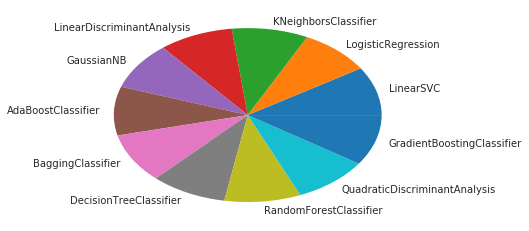

In [636]:
# ========================== Visualization ======================================================
counts = Counter(classifier_accuracy)
plt.pie([float(v) for v in counts.values()], labels=[k for k in counts],
           autopct=None)
plt.show()

## Conclusions
1. **Investigation** 
    - Which passenger characteristics correlate with survival?
        - __Passenger gender correlates with survival:__ Females were more likely to survive than males.
        - __Passenger class correlates with survival:__ The higher the passenger's class, the more likely that he or she survived. 
        
2. **Machine Learning on Titanic dataset**
    - GradientBoostingClassifier can be used to find insights on the Titanic dataset.

